# Summary of study results

### Background

Pymaceuticals Inc. executed an animal study with 250 mice that had the squamous cell carcinoma (SSC). They were treated with different types of drug regimens in a period of 45 days to observe and measure tumor growth. The performance of the company's drug of interest, Capomulin, was compared with the other treatment regimens. The analysis of the results is presented below with some of the most important observations of the study. 

### Observations and Insights

* At first, the summary table suggests that Ramicane and Capomulin regimens are the most effective. Compared with the other 8 regimens, the data of these are less scattered around the mean, less spread, and the samples are more representative of the total population. The last could be due to the samples are bigger than the others.
* The bar plot shows that within the study, there were more data points for Capomulin and Ramicane treatments. Also, it should be noted that none of the 10 regimens had data points below 150, which could benefit the study to obtain more precise results.  
* The pie plot shows that within the study, the sex distribution of the 250 mice has similar values with 50.6% for males and 49.4% for females. However, the study did not concentrate on the sex of the mice to prove the competence of the drug regimens.
* Focusing on the box plot, it can be seen that there are no outliers for the regimens of interest. Besides, the effectiveness of Capomulin and Ramicane treatments appears to be similar. Finally, the tumor volume of the first two is lower than Infubinol and Ceftamin regimens.
* The line plot indicates that Capomulin drug regimen treatment certainly decreases tumor volume of mice during the period of 45 days. Further studies need to be done with a longer period to determine how far it decreases, or even if the tumor is removed.
* Finally, the figure shows that the weight and average tumor volume have a positive and strong correlation. This is known because the Pearson correlation coefficient value is greater than 0.7. Also, looking at the r-squared value, it can be said that the linear regression model seems to well predict the tumor volume values. That is, approximately 70% of the tumor volume data(y values) apparently can be predicted by the weight values(x values). This suggests that weight must be taken into account when mice are undergoing a Capomulin treatment. 

## Dependencies 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "../Resources/Mouse_metadata.csv"
study_results = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [13]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


## Summary statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

In [16]:
regimen_df = combined_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
regimen_df.columns = regimen_df.columns.droplevel(0)

In [17]:
# Rename columns
regimen_df = regimen_df.rename(columns={"mean":"Mean", 
                            "median":"Median",
                           "var": "Variance",
                            "std":"Standard Deviation",
                            "sem": "SEM"})

In [18]:
# Apply style to the df
regimen_df = regimen_df.style.format({"Mean":"{:.2f}",
                                       "Median":"{:.2f}",
                                       "Variance":"{:.2f}",
                                      "Standard Deviation":"{:.2f}",
                                      "SEM":"{:.2f}"
                                       }).highlight_min(color="lightgreen", axis=0).set_properties(
    **{'text-align': 'left'})
regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

In [19]:
# Obtain labels of x axis
regimen_names = regimen_df.index.tolist()
# Define the DF that will be use for plotting grouping 
#by drug regimen and use count method
count_df = combined_df.groupby("Drug Regimen")["Mouse ID"].count()

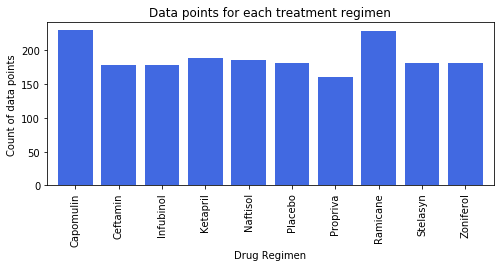

In [20]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_plot = count_df.plot(kind="bar",
                         figsize=(8,3),
                         xlim=(-0.75,len(regimen_names)),
                         width=0.8,
                         title="Data points for each treatment regimen",
                         color="royalblue")
bar_plot.set_ylabel("Count of data points")
plt.show()

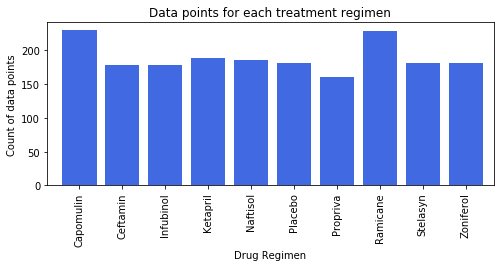

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(8,3))
plt.bar(regimen_names, count_df, color="royalblue")
plt.xticks(np.arange(len(regimen_names)), regimen_names, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of data points")
plt.xlim(-0.75,len(regimen_names)-0.35)
plt.title("Data points for each treatment regimen")
plt.show()


## Pie plots

In [22]:
# Dataframe with the count of gender
gender_df = combined_df["Sex"].value_counts()

In [23]:
# Define parameters for plotting 
explode = (0.1,0)
colors = ["red", "orange"]
labels = ["Male", "Female"]
sizes = [958, 935]

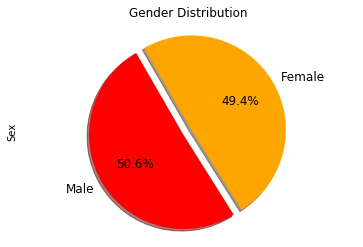

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df.plot(kind="pie", autopct='%1.1f%%',fontsize=12, shadow=True, explode=explode, colors=colors, startangle=120)
plt.axis("equal")
plt.title("Gender Distribution")
plt.show()

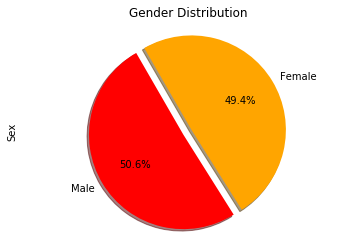

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis("equal")
plt.ylabel("Sex")
plt.title("Gender Distribution")
plt.show()

## Quartiles, outliers and boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [27]:
# Dataframe with the columns of interest
summary_df = combined_df.loc[:,['Mouse ID',
                                'Drug Regimen',
                                'Timepoint',
                                'Tumor Volume (mm3)']]

# Dataframe with data whrn timepoint is equal to 45 (final tumor volume)
summary_df = summary_df.loc[(summary_df["Timepoint"]==45)]

# Group by Drug regimen and Mouse ID, obtain mean and drop the Timepoint column.
summary_df = summary_df.groupby(["Drug Regimen", "Mouse ID"]).mean().drop(columns="Timepoint")

In [28]:
# Dataframe with the regimens of interest
promising_treatments = summary_df.loc[["Capomulin", 
                                       "Ramicane", 
                                       "Infubinol", 
                                       "Ceftamin"]].round(3)

# Use method unstack to put Drug regimen as columns
promising_treatments.unstack(level=0)

Tumor Volume (mm3)                            
Drug Regimen          Capomulin Ceftamin Infubinol Ramicane
Mouse ID                                                   
b128                     38.983      NaN       NaN      NaN
b742                     38.940      NaN       NaN      NaN
g288                     37.074      NaN       NaN      NaN
g316                     40.159      NaN       NaN      NaN
i557                     47.686      NaN       NaN      NaN
...                         ...      ...       ...      ...
q597                        NaN      NaN       NaN   45.221
r811                        NaN      NaN       NaN   37.226
s508                        NaN      NaN       NaN   30.276
u196                        NaN      NaN       NaN   40.668
z578                        NaN      NaN       NaN   30.639

[63 rows x 4 columns]

In [29]:
# Define function to obtain lower quartile, upper quartile, interquartile range
# and values to identify outliers

def Tumor_Data(treatment):
    quartiles = promising_treatments["Tumor Volume (mm3)"][treatment].quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round((upperq-lowerq),2)
    lower_bound = round((lowerq - (1.5*iqr)),2)
    upper_bound = round((upperq + (1.5*iqr)),2)
    print(f"The lower quartile of tumor volume of {treatment} treatment is: {lowerq}")
    print(f"The upper quartile of tumor volume of {treatment} treatment is: {upperq}")
    print(f"The interquartile range of tumor volume of {treatment} treatment is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("-------------------------------------------------------------")

In [30]:
Tumor_Data("Capomulin")
Tumor_Data("Ramicane")
Tumor_Data("Infubinol")
Tumor_Data("Ceftamin")

The lower quartile of tumor volume of Capomulin treatment is: 32.38
The upper quartile of tumor volume of Capomulin treatment is: 40.16
The interquartile range of tumor volume of Capomulin treatment is: 7.78
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
-------------------------------------------------------------
The lower quartile of tumor volume of Ramicane treatment is: 30.98
The upper quartile of tumor volume of Ramicane treatment is: 38.51
The interquartile range of tumor volume of Ramicane treatment is: 7.53
Values below 19.69 could be outliers.
Values above 49.8 could be outliers.
-------------------------------------------------------------
The lower quartile of tumor volume of Infubinol treatment is: 62.75
The upper quartile of tumor volume of Infubinol treatment is: 67.69
The interquartile range of tumor volume of Infubinol treatment is: 4.94
Values below 55.34 could be outliers.
Values above 75.1 could be outliers.
-----------------------------

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [32]:
# Define a function to create an array of the final tumor volume data for the four regimens
final_array = []
def data_volume(med):
    for values in promising_treatments["Tumor Volume (mm3)"][med]:
        array = promising_treatments["Tumor Volume (mm3)"][med].to_list()
    final_array.append(array)

In [33]:
# Call function to obtain final array
data_volume("Capomulin")
data_volume("Ramicane")
data_volume("Infubinol")
data_volume("Ceftamin")

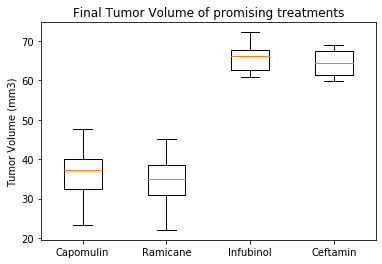

In [34]:
# Use the final array of the four regimens to plot them in the same figure
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of promising treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(final_array, showfliers=True)
ax1.set_xticklabels(["Capomulin", "Ramicane","Infubinol", "Ceftamin"])
plt.show()

## Line and scatter plots

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [36]:
# Define Dataframe with columns of interest
summary_df_2 = combined_df.loc[:, ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
# Define Dataframe with Capomulin regimen
summary_df_2 = summary_df_2.loc[summary_df_2["Drug Regimen"]=="Capomulin"]
# Group by timepoint and obtain dataframe to make graph
summary_df_2 = summary_df_2.groupby("Timepoint").mean()
summary_df_2

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,44.266086
10,43.084291
15,42.064317
20,40.716325
25,39.939528
30,38.769339
35,37.816839
40,36.958001


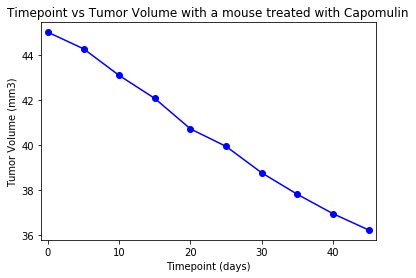

In [37]:
plt.plot(summary_df_2, color="blue", marker="o")
plt.xlim(-1,46)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume with a mouse treated with Capomulin")
#plt.grid()
plt.show()

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [39]:
# Define Dataframe with columns of interest
summary_df_3 = combined_df.loc[:,[ 'Mouse ID', 'Drug Regimen','Weight (g)',
       'Tumor Volume (mm3)']]
# Define Dataframe with Capomulin regimen
summary_df_3 = summary_df_3.loc[summary_df_3["Drug Regimen"]=="Capomulin"]
# Group by mouse ID and obtain dataframe to make graph
summary_df_3 = summary_df_3.groupby("Mouse ID").mean()
summary_df_3

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


The correlation between both factors is: 0.84


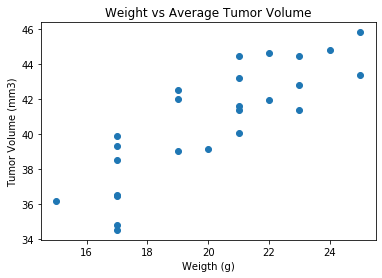

In [43]:
x_values = summary_df_3["Weight (g)"]
y_values = summary_df_3["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values)
plt.xlabel("Weigth (g)")
plt.ylabel("Tumor Volume (mm3)")
#plt.xlim(0,27)
plt.title("Weight vs Average Tumor Volume")
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is: {round(correlation[0],2)}")
plt.show()

In [41]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

The correlation between both factors is: 0.84
The r-squared value is: 0.71


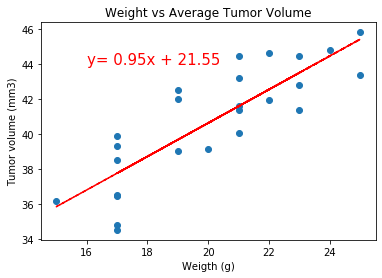

In [42]:
x_values = summary_df_3["Weight (g)"]
y_values = summary_df_3["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
plt.text(16,44,equation,color="red", fontsize=15)
plt.xlabel("Weigth (g)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Weight vs Average Tumor Volume")
rsquared = rvalue**2
print(f"The correlation between both factors is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rsquared,2)}")
plt.show()